# Modular CerberusTS Experimentation

In [1]:
import os
os.chdir("..")

In [2]:
from cerberus_ts import Cerberus, train_cerberus
from cerberus_ts import TimeseriesDataPreparer, ResponseGenerator
import pandas as pd

c:\Users\johnm\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r"data/jena_climate_2009_2016.csv",
                parse_dates=['Date Time'], 
                index_col=['Date Time'])
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
df = df.iloc[:5000,:]

In [4]:
thresholds = {
    'call': 1,
    'response': 1,
    'context_0': 1,
    'context_1': 1,
    'context_2': 1
}

sizes = {
    'call': 24,
    'response': 8,
    'context_0': 24,
    'context_1': 12,
    'context_2': 6
}

window_timesteps = {
    'call': '10T',
    'response': '10T',
    'context_0': '1H',
    'context_1': '2H',
    'context_2': '6H'
}

window_sizes = {
    'call': 24,
    'response': 8,
    'context_0': 24,
    'context_1': 12,
    'context_2': 6
}

feature_indexes = {
    'call': range(0,14),
    'response': [0, 1, 4],
    'context_0': range(0,14),
    'context_1': range(0,14),
    'context_2': range(0,14)   
}

In [5]:
# Initialize the preparer
preparer = TimeseriesDataPreparer(df, sizes, thresholds, feature_indexes, window_timesteps, train_len = 20_000, feature_range = (0, 1))

# Prepare the data
preparer.prepare_data()

In [6]:
model = Cerberus(sizes, feature_indexes)

In [7]:
model = train_cerberus(model, preparer.dataloaders, num_epochs = 60)

Epoch [1/5], Loss: 0.00597034767580529
Epoch [2/5], Loss: 0.0013396955688949675
Epoch [3/5], Loss: 0.0011832307236424337
Epoch [4/5], Loss: 0.0011171454257176568
Epoch [5/5], Loss: 0.0010775662780118484


          0         1         2
0  0.922133  0.430669  0.843804
1  0.921407  0.431156  0.838844
2  0.920709  0.432202  0.833249
3  0.920001  0.433417  0.826237
4  0.919282  0.434327  0.820447
5  0.918560  0.435637  0.813807
6  0.917863  0.437009  0.807059
7  0.917189  0.438804  0.799985
8  0.916475  0.439898  0.793305


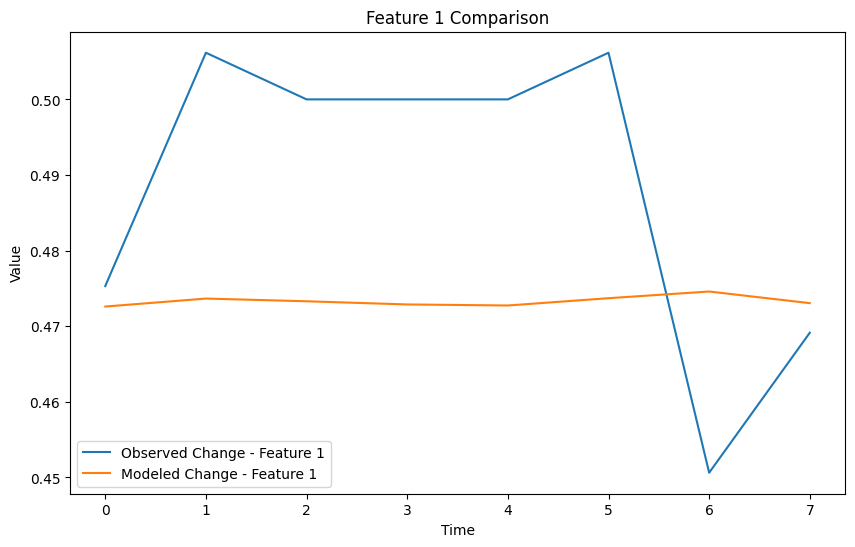

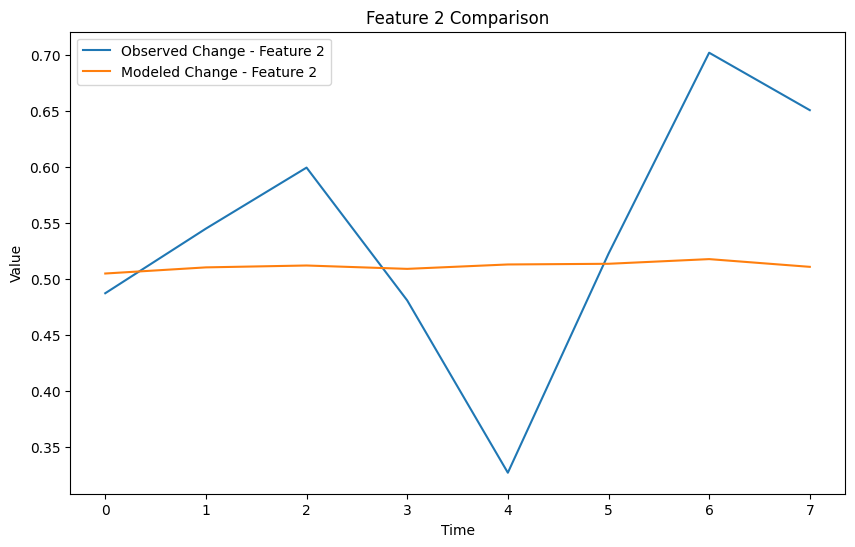

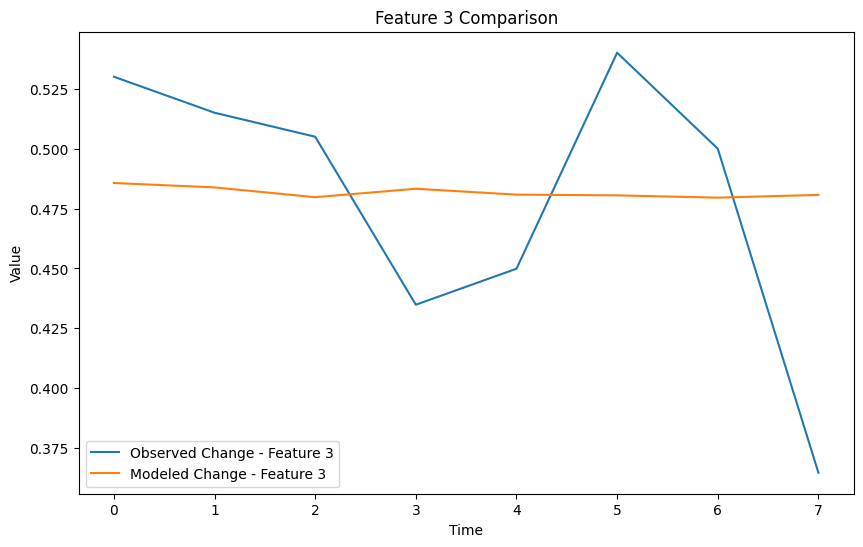

In [8]:
# Intialize Response Generator
generator = ResponseGenerator(model, preparer.sliced_data, feature_indexes, preparer.max_change_dfs)

# Generate a response for a specific index
sel_index = 123
generator.generate_response(sel_index)

print(generator.denormalized_response)
generator.plot_normalized_responses()

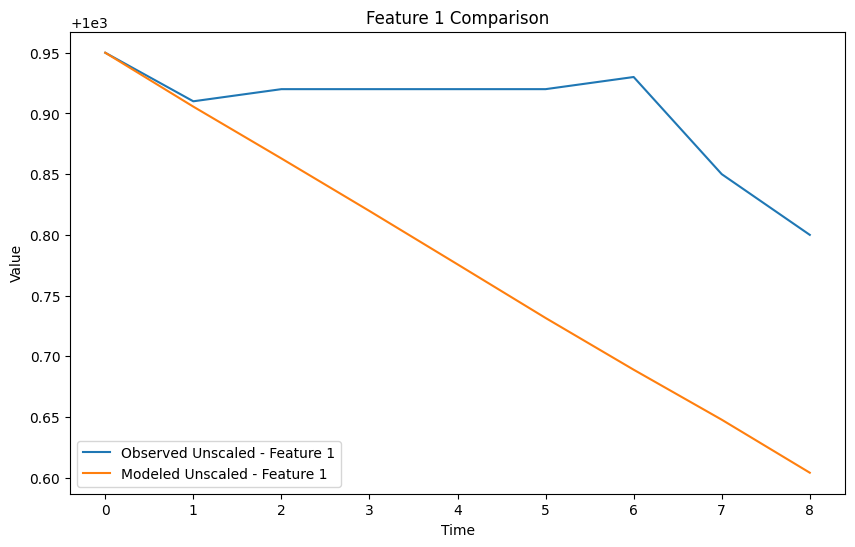

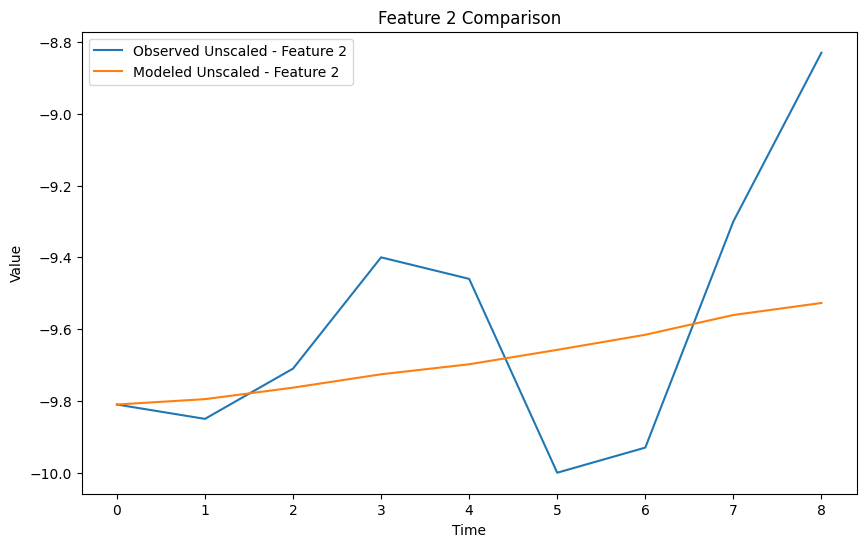

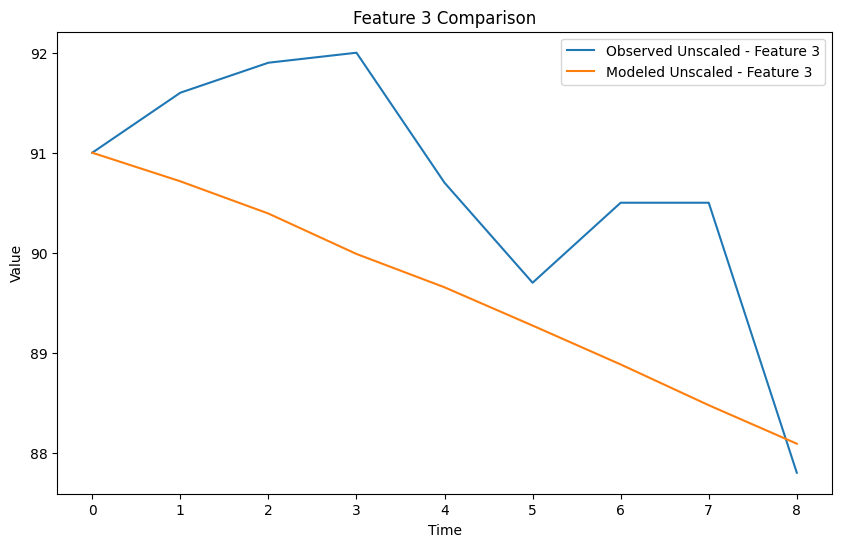

In [10]:
generator.plot_unscaled_responses(preparer.min_max_df, feature_indexes)